<a href="https://colab.research.google.com/github/Machocho254/K-NN-and-Naive_Bayes_IP/blob/master/Moringa_School_DSCORE_WEEK9_IP_FEBRUARY_2020_Mengo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Naive Bayes 

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> The National Institute of Diabetes and Digestive and Kidney Diseases would like to have a predictive modeling solution for a problem they are currently facing. Based on certain diagnostic measurements included in the provided dataset, diagnostically predict whether or not a patient has diabetes or not.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [4]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = Dataset source = http://bit.ly/DiabetesDataSource
import pandas as pd
import numpy as np

test = pd.read_csv('/content/test (1).csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train = pd.read_csv('/content/train (1).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




## 3. Checking the Data

> We will use the train dataset because the test dataset does not have a repsonce variable. 

In [6]:
# Determining the no. of records in our dataset
#
train.shape

# the dataset has 12 variables and 891 rows

(891, 12)

In [7]:
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Previewing the bottom of our dataset
# 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# checking for duplicates
# 
train.duplicated().any()

# the data has no duplicates 

False

In [11]:
# description of the dataset 
# 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> The passengerid and ticket columns will be dropped. The passengerid column is just a bunch of intergers used to identify the passengers. Ticket column will be deleted because the values are distinct for every passenger. 



> Map the values for the sex column to 0 for males and 1 for females to create a binary dataset. 

> Extract the titles from the names column. We map the titles as 0 for the common titles i.e "MRS, MR. and Miss" and 1 for the titles that are not as common i.e "DR., REV, ENG" etc. 

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

> The data 

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [0]:
# mapping the Sex column to Males 0 and 1 for females
# 
gender_changer = {'male': 0, 'female': 1}
train['Sex'].replace(gender_changer, inplace=True)


In [0]:
# for the cabin variable, we rename the column to Cabin_Known 
# where there is information about the cabin, we map 1 and where it is unknown we map 0
# 
train['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in train['Cabin']]

# dropping the cabin column as we will not be needing it 
# 
train.drop('Cabin', axis=1, inplace=True)

In [0]:
# dropping the two unnecesary columns
# 
train.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

In [0]:
# extracting the titles from the Name columns
# 
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
train['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in train['Title']]
train = train.rename(columns={'Title': 'Title_Unusual'})

# dropping the Name column as we no longer have use for it. 
train.drop('Name', axis=1, inplace=True)



In [16]:
# checking for missing values 
# 
train.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
Cabin_Known        0
Title_Unusual      0
dtype: int64

In [17]:
# previewing the Age column
pd.set_option('display.max_rows', 1000)
train['Age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5        NaN
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17       NaN
18     31.00
19       NaN
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26       NaN
27     19.00
28       NaN
29       NaN
30     40.00
31       NaN
32       NaN
33     66.00
34     28.00
35     42.00
36       NaN
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42       NaN
43      3.00
44     19.00
45       NaN
46       NaN
47       NaN
48       NaN
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55       NaN
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64       NaN
65       NaN
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76       NaN

> The age, embarked and Cabin variables have missing values. 

>>Drop the cabin variable because it has been observed that all the 2nd and 3rd class passengers did not get cabins, which explains why the missing values are that many. 


>> Get dummies for the embarked column. Then drop the Embarked column to make sure there is no colinearity between the variables. 

>> For the Age column, we fill in the missing values using the MICE, or Multivariate Imputation by Chained Equation which is an imputation method which works by filling the missing data multiple times, creating multiple complete datasets. 

More information on the MICE is here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/#R30

In [0]:
# getting the dummy variables for the embarked column
# 
emb_dummies = pd.get_dummies(train['Embarked'], drop_first=True, prefix='Embarked')
titanic = pd.concat([train, emb_dummies], axis=1)

# dropping the embarked column to avoid colinearity
# 
titanic.drop('Embarked', axis=1, inplace=True)

In [19]:
titanic.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Cabin_Known        0
Title_Unusual      0
Embarked_Q         0
Embarked_S         0
dtype: int64

In [31]:
# filling in the missing values using MICE
# installing impyute using pip
# 
!pip install impyute

# import the imputation library from impyute
# 

from impyute.imputation.cs import mice

# drop the response variable as the AGE variable will be the response variable 
# 
X = titanic.drop('Survived', axis=1)

# instatiating the MICE approach
imputed = mice(X.values)
mice_ages = imputed[:, 2]

> The basic idea is to treat each variable with missing values as the dependent variable in a regression, with some or all of the remaining variables as its predictors. (This is why the Survived column was dropped.) 

>The MICE procedure cycles through these models, fitting each in turn, then uses a procedure called “predictive mean matching” (PMM) to generate random draws from the predictive distributions determined by the fitted models. These random draws become the imputed values for one imputed data set.

In [0]:
# as the minimum value has changed to -7, we scale the data as we cannot have a negative value for age
# 
mice_ages = [0 if age < 0 else age for age in mice_ages]

In [33]:
# adding the mice_ages in the titanic dataframe
# 
titanic['New_age'] = mice_ages

# previewing the new dataframe
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Known,Title_Unusual,Embarked_Q,Embarked_S,New_age
0,0,3,0,22.0,1,0,7.2500,0,0,0,1,22.0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,38.0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1,26.0
3,1,1,1,35.0,1,0,53.1000,1,0,0,1,35.0
4,0,3,0,35.0,0,0,8.0500,0,0,0,1,35.0


In [34]:
# dropping the Age column as we no longer have use for it 
# 

titanic.drop('Age', axis=1, inplace=True)

# previewing the final dataframe
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin_Known,Title_Unusual,Embarked_Q,Embarked_S,New_age
0,0,3,0,1,0,7.2500,0,0,0,1,22.0
1,1,1,1,1,0,71.2833,1,0,0,0,38.0
2,1,3,1,0,0,7.9250,0,0,0,1,26.0
3,1,1,1,1,0,53.1000,1,0,0,1,35.0
4,0,3,0,0,0,8.0500,0,0,0,1,35.0


#### **OUTLIER MANAGEMENT**

In [0]:
# importing the necesary libraries for data viz
# 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# creating a list of all numerical variables for outliers management
# 
num_cols = titanic[['New_age', 'Fare', 'SibSp']]

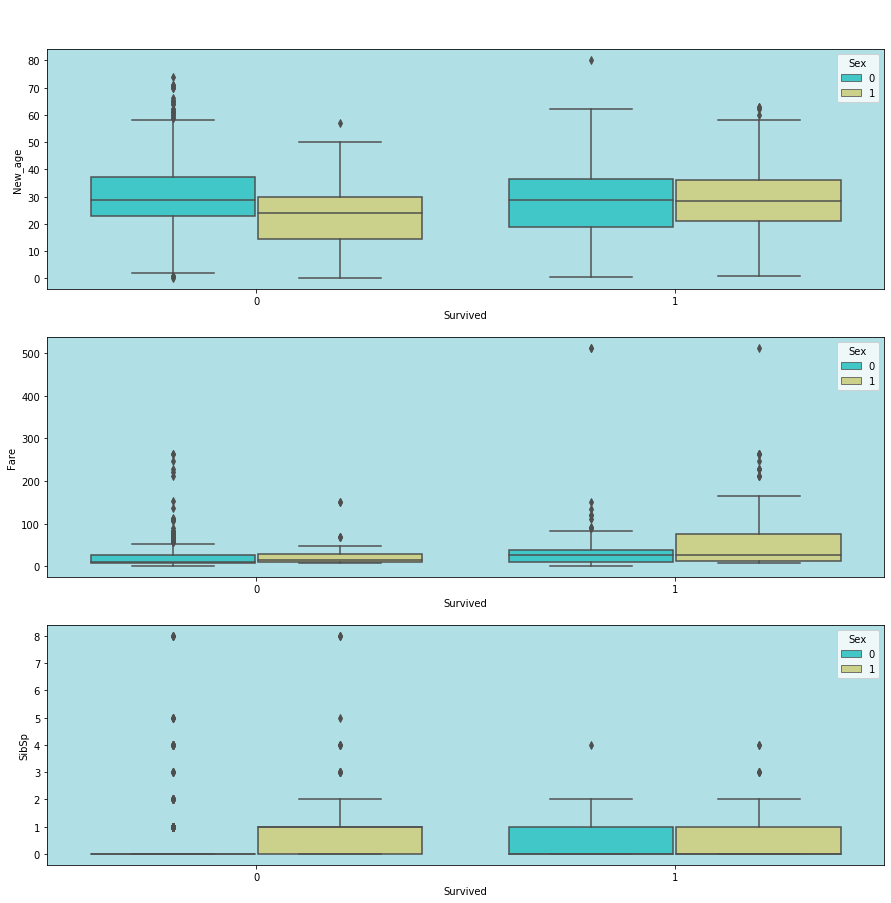

In [37]:
# Plotting boxplots to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 15))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'white')
for ax, data, column in zip(axes.flatten(), titanic, num_cols):
  sns.boxplot(titanic.Survived, titanic[column], ax = ax, hue = titanic.Sex, palette = 'rainbow')
  ax.set_facecolor('powderblue')

> From the above output, it is clear that there is a heavy presence of outliers for both male and female passengers. 

>> From the data validation, I learnt that The Titanic allowed passangers upto as old as 80years old. Hence
the outliers for the Age variable will not be dropped. 

> There is a significant amount of outliers in the fare variable for both the male and female genders. However, it seems that the males have more prevalence for the outliers than females

> For the sibling and spouse variable, the presence of outliers is more pronounced where there was no survival than when there is survival. The seems to be a prevalence in the males for the occurence of outliers. 

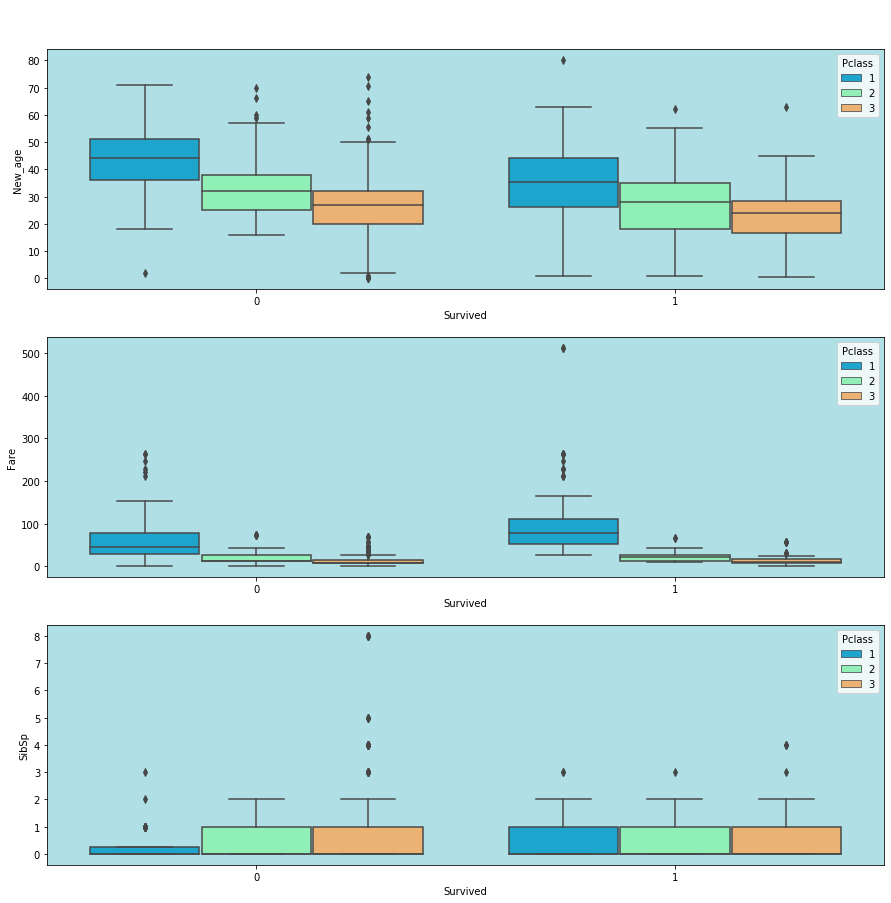

In [38]:
# Plotting boxplots to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 15))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'white')
for ax, data, column in zip(axes.flatten(), titanic, num_cols):
  sns.boxplot(titanic.Survived, titanic[column], ax = ax, hue = titanic.Pclass, palette = 'rainbow')
  ax.set_facecolor('powderblue') 

In [39]:
# Checking for Anomalies
## checking for accuracy consistency and uniformity of the data
# unique values of the columns
for column in titanic.columns:
  print(column)
  print(titanic[column].nunique())
  print(titanic[column].unique())
  print('\n')


Survived
2
[0 1]


Pclass
3
[3 1 2]


Sex
2
[0 1]


SibSp
7
[1 0 3 4 2 5 8]


Parch
7
[0 1 2 5 3 4 6]


Fare
248
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925 

In [0]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

#### **UNIVARIATE ANALYSIS**

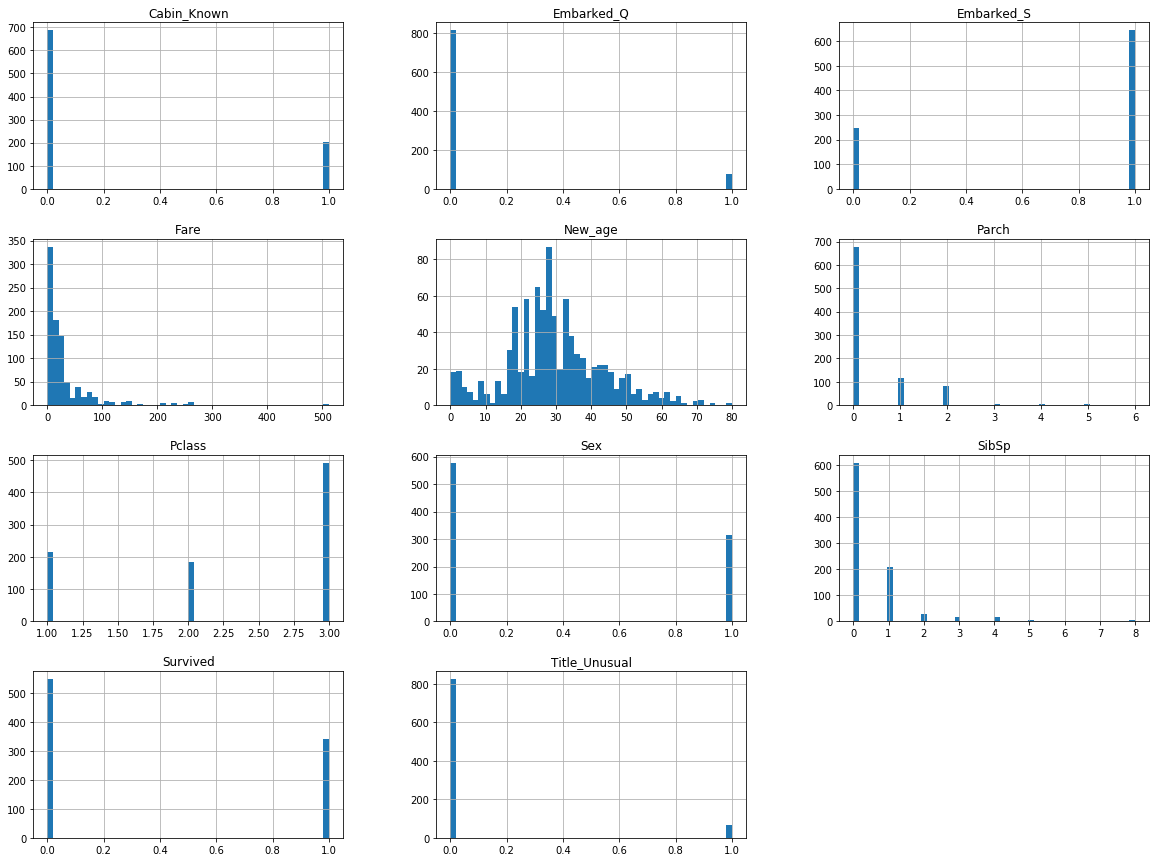

In [41]:
# TO VISUALIZE the distribution of all the columns 
# 
#Distribution plot
titanic.hist(bins=50,figsize=(20,15))
plt.show()

#### **BIVARIATE ANALYSIS**

In [42]:
# Previewing the dataset
# 
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin_Known,Title_Unusual,Embarked_Q,Embarked_S,New_age
0,0,3,0,1,0,7.2500,0,0,0,1,22.0
1,1,1,1,1,0,71.2833,1,0,0,0,38.0
2,1,3,1,0,0,7.9250,0,0,0,1,26.0
3,1,1,1,1,0,53.1000,1,0,0,1,35.0
4,0,3,0,0,0,8.0500,0,0,0,1,35.0


In [0]:
# Ploting the bivariate summaries and recording our observations
#

#### **MULTIVARIATE ANALYSIS**

Feature reduction using the Principal Components Analysis. 

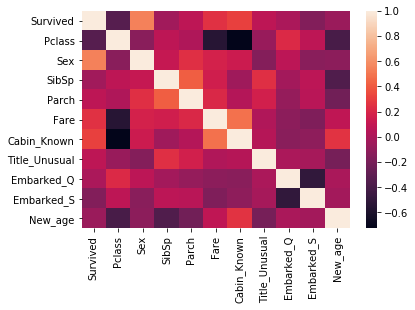

In [44]:
# checking for the correlation of the dataframe
# 

sns.heatmap(titanic.corr())  

In [45]:
# Data Reduction
# using the Principal Component analysis

#Finding the best principal Components
from sklearn.decomposition import PCA
np.random.seed(0)
X = titanic.drop(['PassengerId','Name','Ticket','Fare'], axis=1)
X = pd.get_dummies(X)
train_features = X
model = PCA(n_components=5).fit(train_features)
# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked_Q', 'Embarked_S']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

KeyError: ignored

## 7. **MODELLING**

**BASELINE MODEL** 

As this is a classification problem, the baseline model will be a logistic regression model

In [0]:
# import all the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [47]:
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin_Known,Title_Unusual,Embarked_Q,Embarked_S,New_age
0,0,3,0,1,0,7.2500,0,0,0,1,22.0
1,1,1,1,1,0,71.2833,1,0,0,0,38.0
2,1,3,1,0,0,7.9250,0,0,0,1,26.0
3,1,1,1,1,0,53.1000,1,0,0,1,35.0
4,0,3,0,0,0,8.0500,0,0,0,1,35.0


In [0]:
# # Splitting our dataset
#
X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [49]:
# Fitting our model
# 
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [51]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[140,  25],
       [ 29,  74]])

> From the confusion matrix, it is clear that there are 54 false predictions. 

#### **K-NEAREST NEIGHBOURS**

In [0]:
# scalling the data  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# fitting the model
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# using the model to make predictions
# 
y_pred = classifier.predict(X_test)

In [55]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[137  28]
 [ 24  79]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       165
           1       0.74      0.77      0.75       103

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?

# **SPAM DATA ANALYSIS**

## **Definition of the Question**

We have been provided with a dataset that classifies text as either spam or not spam. 
We have been tasked with creating a model that classifies inputs as spam or not spam given certain variables. 

## **Reading the Data**

In [57]:
# uploading the dataset
# 
spam = pd.read_table('/content/spambase.data', sep=',')
spam.head()


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [0]:
# names of the columns have been extracted using notepad++
# creating a list  of the column names called names
# 
names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
        'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail', 'word_freq_receive','word_freq_will',
        'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
         'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
         'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
         'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
         'capital_run_length_total','spam']

# changing the column names 
# 
spam.columns = names

## **Checking the Dataset**

In [60]:
# previewing the first observations of the data
# 
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [61]:
# previewing the last observations
# 
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [63]:
# checking information about the dataset
# 
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
word_freq_make                4600 non-null float64
word_freq_address             4600 non-null float64
word_freq_all                 4600 non-null float64
word_freq_3d                  4600 non-null float64
word_freq_our                 4600 non-null float64
word_freq_over                4600 non-null float64
word_freq_remove              4600 non-null float64
word_freq_internet            4600 non-null float64
word_freq_order               4600 non-null float64
word_freq_mail                4600 non-null float64
word_freq_receive             4600 non-null float64
word_freq_will                4600 non-null float64
word_freq_people              4600 non-null float64
word_freq_report              4600 non-null float64
word_freq_addresses           4600 non-null float64
word_freq_free                4600 non-null float64
word_freq_business            4600 non-null float64
word_freq

In [65]:
# checking the shape of the dataset
# 
spam.shape

# the dataset has 58 variables with 4600 observations

(4600, 58)

In [66]:
# checking for the datatypes of the variables
# 
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [69]:
# to get the statistical description of the data
# 
spam.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4600.0,0.104576,0.305387,0.0,0.000,0.0000,0.00000,4.540
word_freq_address,4600.0,0.212922,1.290700,0.0,0.000,0.0000,0.00000,14.280
word_freq_all,4600.0,0.280578,0.504170,0.0,0.000,0.0000,0.42000,5.100
word_freq_3d,4600.0,0.065439,1.395303,0.0,0.000,0.0000,0.00000,42.810
word_freq_our,4600.0,0.312222,0.672586,0.0,0.000,0.0000,0.38250,10.000
word_freq_over,4600.0,0.095922,0.273850,0.0,0.000,0.0000,0.00000,5.880
word_freq_remove,4600.0,0.114233,0.391480,0.0,0.000,0.0000,0.00000,7.270
word_freq_internet,4600.0,0.105317,0.401112,0.0,0.000,0.0000,0.00000,11.110
word_freq_order,4600.0,0.090087,0.278643,0.0,0.000,0.0000,0.00000,5.260
word_freq_mail,4600.0,0.239465,0.644816,0.0,0.000,0.0000,0.16000,18.180


## **Tidying the Dataset**

In [70]:
# checking for missing values
# 
spam.isnull().sum()

# this dataset does not have missing values.

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [71]:
# checking for anomalies in the data
# checking for accuracy consistency and uniformity of the data
# unique values of the columns
# 
for column in spam.columns:
  print(column)
  print(spam[column].nunique())
  print(spam[column].unique())
  print('\n')

word_freq_make
142
[0.21 0.06 0.   0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]


word_freq_address
171
[2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01 7.000e-02
 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01 1.920e+00
 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01 4.400e-01
 9.400e-01 1.800e-01 7

In [72]:
# checking for duplicates
# 
spam.duplicated().any()

# the data contains duplicated observations

True

In [73]:
# dropping the duplicated values
# Keep every first data point of the duplicated datapoints
#
spam.drop_duplicates(keep='first', inplace = True)

# Check to confirm whether duplicates have been dropped
#
spam.duplicated().any()

# duplicates have been dropped 

False

In [74]:
# checking to see new shape of the dataset after dropping the duplicates
# 
spam.shape

(4209, 58)

In [76]:
# checking for outliers
# use the Z-score approach
# 
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(spam))
print(z)

[[0.35203068 0.3687239  0.40452578 ... 0.24482253 1.19099523 1.22814627]
 [0.14796835 0.24776187 0.81174673 ... 2.16884257 3.18079631 1.22814627]
 [0.34796797 0.24776187 0.56504793 ... 0.06081607 0.16194019 1.22814627]
 ...
 [0.6520301  0.24776187 0.01669629 ... 0.23117201 0.27993815 0.81423526]
 [2.85202586 0.24776187 0.56504793 ... 0.23618248 0.34459456 0.81423526]
 [0.34796797 0.24776187 0.69539789 ... 0.23618248 0.40601815 0.81423526]]


In [77]:
# set the threshold 
# we will set the threshold as 3

threshold = 3
print(np.where(z > 3))

# there is presence of a few outliers 
# we will drop them

(array([   1,    1,    1, ..., 4200, 4201, 4202]), array([14, 22, 56, ...,  4, 45, 29]))


In [0]:
# dropping the outliers
# 
spam_1 = spam[(z < 3).all(axis=1)]

In [79]:
# checking the new shape of the dataset after dropping outliers
# 
spam_1.shape

# removing the outliers gets rid of approximately 50% of the data
# we will use the original data for the modelling

(2056, 58)

## **Exploratory Data Analysis**

### **UNIVARIATE ANALYSIS**

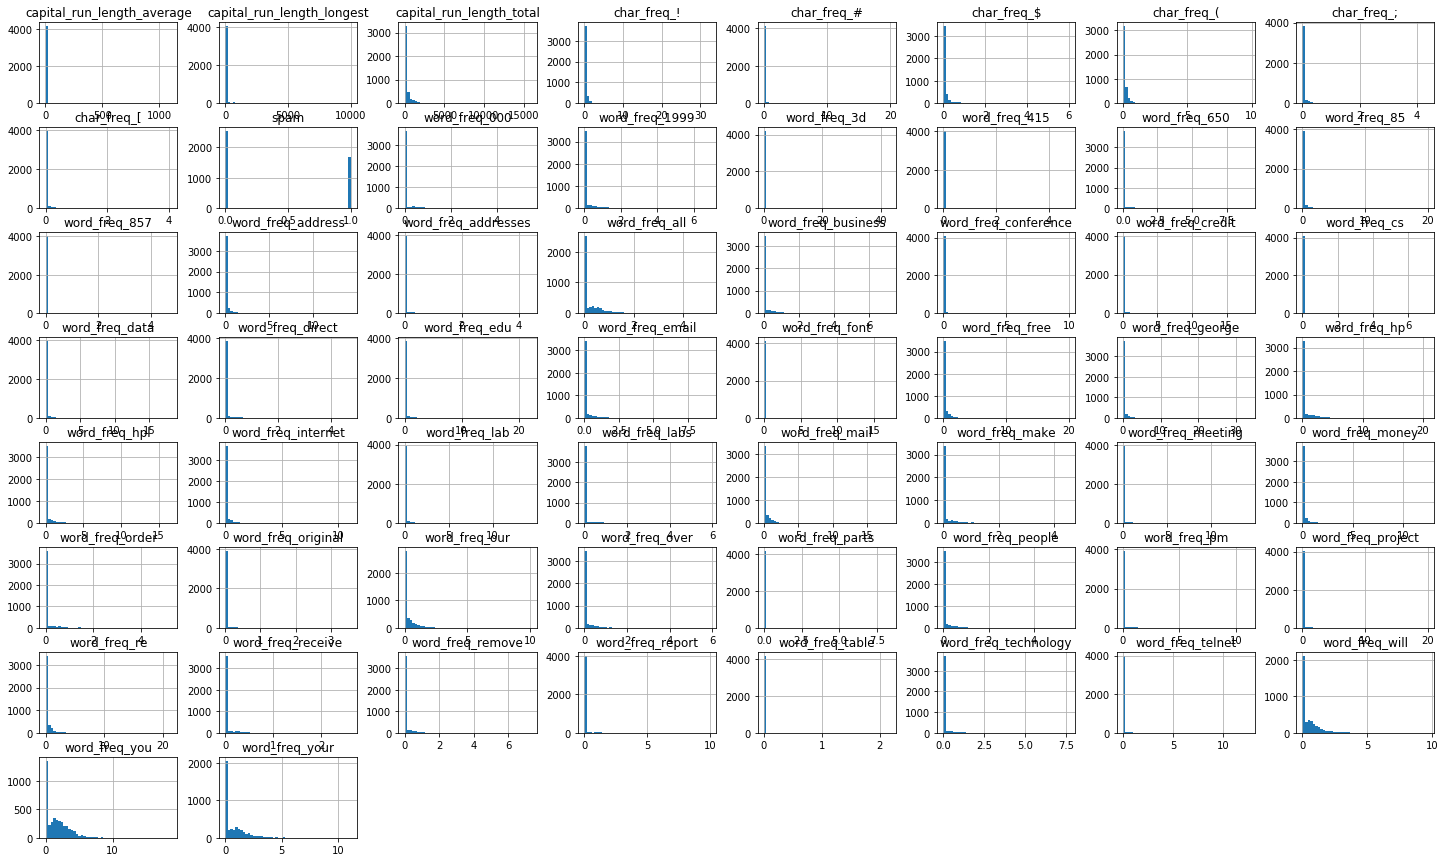

In [95]:
# TO VISUALIZE the distribution of all the columns 
# 
#Distribution plot
spam.hist(bins=50,figsize=(25,15))
plt.show()

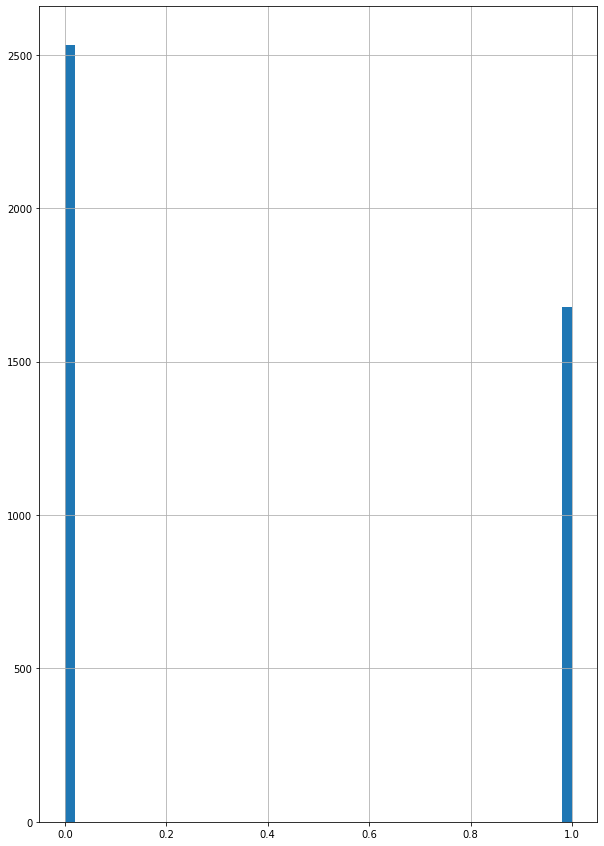

In [96]:
# getting the distribution of the response variable
# using a dist plot
# 
spam['spam'].hist(bins=50,figsize=(10,15))
plt.show()

# the not spam observations are more than the spam observation
# the data is not balanced. 

In [97]:
# to get the mean, maximum values, minimum values, standard deviation
# 
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.044928,0.102357,0.045788,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.300783,0.569211,0.301847,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

### **MULTIVARIATE ANALYSIS**

Variable reduction using the PCA.

In [98]:
# to check the columns in the data
# 
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


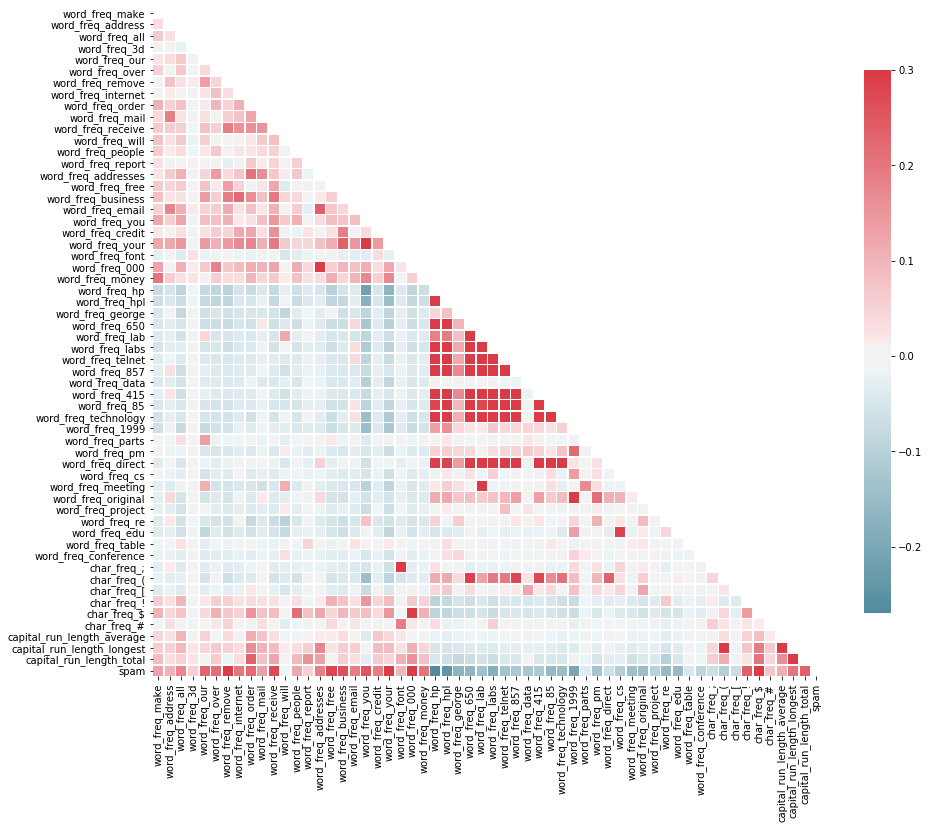

In [99]:
# to check for the correlation in the dataset
# using the heatmap to check for multicolinearity
# Compute the correlation matrix
corr = spam.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

> Some variables are highly correlated. We will need to do a variale reduction. BUt because the data has alot of variables, the PCA approach to data reduction is applied. 

> Principal components analysis.

In [110]:
# Data Reduction
# using the Principal Component analysis

#Finding the best principal Components
from sklearn.decomposition import PCA
np.random.seed(0)
X = spam.drop(['spam'], axis=1)
# X = pd.get_dummies(X)
train_features = X
model = PCA(n_components=10).fit(train_features)
# number of components 
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component 
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = spam.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,capital_run_length_total
1,PC1,capital_run_length_longest
2,PC2,capital_run_length_average
3,PC3,word_freq_you
4,PC4,word_freq_george
5,PC5,word_freq_you
6,PC6,word_freq_3d
7,PC7,word_freq_your
8,PC8,word_freq_font
9,PC9,word_freq_re


In [111]:
# getting the explained variance and explained variance ratio
# 
explained_variances_ratios = model.explained_variance_ratio_

explained_variance = model.explained_variance_

# adding the explained_variances_ratio column to the PC df
# 
df['explained_variances_ratios'] = explained_variances_ratios
df

,0,1,explained_variances_ratios
0,PC0,capital_run_length_total,0.925462
1,PC1,capital_run_length_longest,0.072563
2,PC2,capital_run_length_average,0.001915
3,PC3,word_freq_you,0.000010
4,PC4,word_freq_george,0.000007
5,PC5,word_freq_you,0.000006
6,PC6,word_freq_3d,0.000004
7,PC7,word_freq_your,0.000003
8,PC8,word_freq_font,0.000003
9,PC9,word_freq_re,0.000002


> We have reduced the number of variables to 15 principal components. To get the explained variance of each

## **MODELLING**


In [0]:
# importing all necesary libraries
# 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### **BASELINE MODEL**

This is a classification problem, our baseline model will be a logistic model for classification. 

In [0]:
# splitting the data into train and test datasets
# assigning values to x and y
# 
X = spam.drop(['spam'], axis=1)
y = spam['spam'].values

# split the data into train dataset using 80% of the data
# 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [114]:
# fitting the model 
# 
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using the model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [116]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[461,  34],
       [ 37, 310]])

### **NAIVE BAYES CLASSIFIER**

We will use the Bernoulli Naive Bayes classifier

In [0]:
## Training our Bernoulli Naive Bayes Classifier
# 
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

In [0]:
# Train model
model = clf.fit(X, y)

In [119]:
# model score
model.score(X, y)

0.8885721073889284

In [0]:
# using the multinomial naive bayes
# 

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [121]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7921615201900237


### **Optimising the Classifier**

## **EVALUATION OF THE MODELS**



1.   Explaining the confusion matrix
2.   Explaining the area under the curve 
3.   

